### Telco Customer Churn Analysis & Prediction

https://www.kaggle.com/code/zaimasyarifaasshafa/telco-customer-churn-analysis-prediction#modeling

In [1]:
# Import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# setting display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
cust = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/09_machine_learning/customer_churn_decision_tree/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking duplicated data
cust.duplicated().any()

np.False_

In [8]:
# Checking missing values
cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
#  Check the count and what unique values exist for each feature
for col in cust.columns:
    print(f"Column: {col}")
    print(f"Num unique: {cust[col].nunique()}")
    print("Unique values:", cust[col].unique())
    print("-" * 40)

Column: customerID
Num unique: 7043
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column: gender
Num unique: 2
Unique values: ['Female' 'Male']
----------------------------------------
Column: SeniorCitizen
Num unique: 2
Unique values: [0 1]
----------------------------------------
Column: Partner
Num unique: 2
Unique values: ['Yes' 'No']
----------------------------------------
Column: Dependents
Num unique: 2
Unique values: ['No' 'Yes']
----------------------------------------
Column: tenure
Num unique: 73
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Column: PhoneService
Num unique: 2
Unique values: ['No' 'Yes']
----------------------------------------
Column:

In [10]:
# Mask for all columns
mask_empty_all = cust.applymap(lambda x: isinstance(x, str) and x.strip() == '')

# Count of empty strings per column
empty_count_per_col = mask_empty_all.sum()

print("Number of empty strings per column:")
print(empty_count_per_col)

Number of empty strings per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
cust['TotalCharges'] = pd.to_numeric(cust['TotalCharges'], errors='coerce')

In [12]:
# Checking missing values
cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
# Fill NaN values only in the 'TotalCharges' column with 0
cust['TotalCharges'] = cust['TotalCharges'].fillna(0)

In [14]:
# Checking missing values
cust.isnull().any().sum()

np.int64(0)

In [15]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Grouping Categorical and Numerical Columns
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
def hist_boxplot(df, cols):
    # Create a subplot with 2 rows (histogram, boxplot) and len(cols) columns
    fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 8))

    for i, col in enumerate(cols):
        # Plot histogram with #9EBC8A
        sns.histplot(
            data=df, x=col, ax=axes[0, i], kde=True, color='#9EBC8A'
        )
        axes[0, i].set_title(f'Histogram of {col}', color='#537D5D')

        # Plot boxplot with #73946B
        sns.boxplot(
            data=df, x=col, ax=axes[1, i], color='#73946B'
        )
        axes[1, i].set_title(f'Boxplot of {col}', color='#537D5D')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

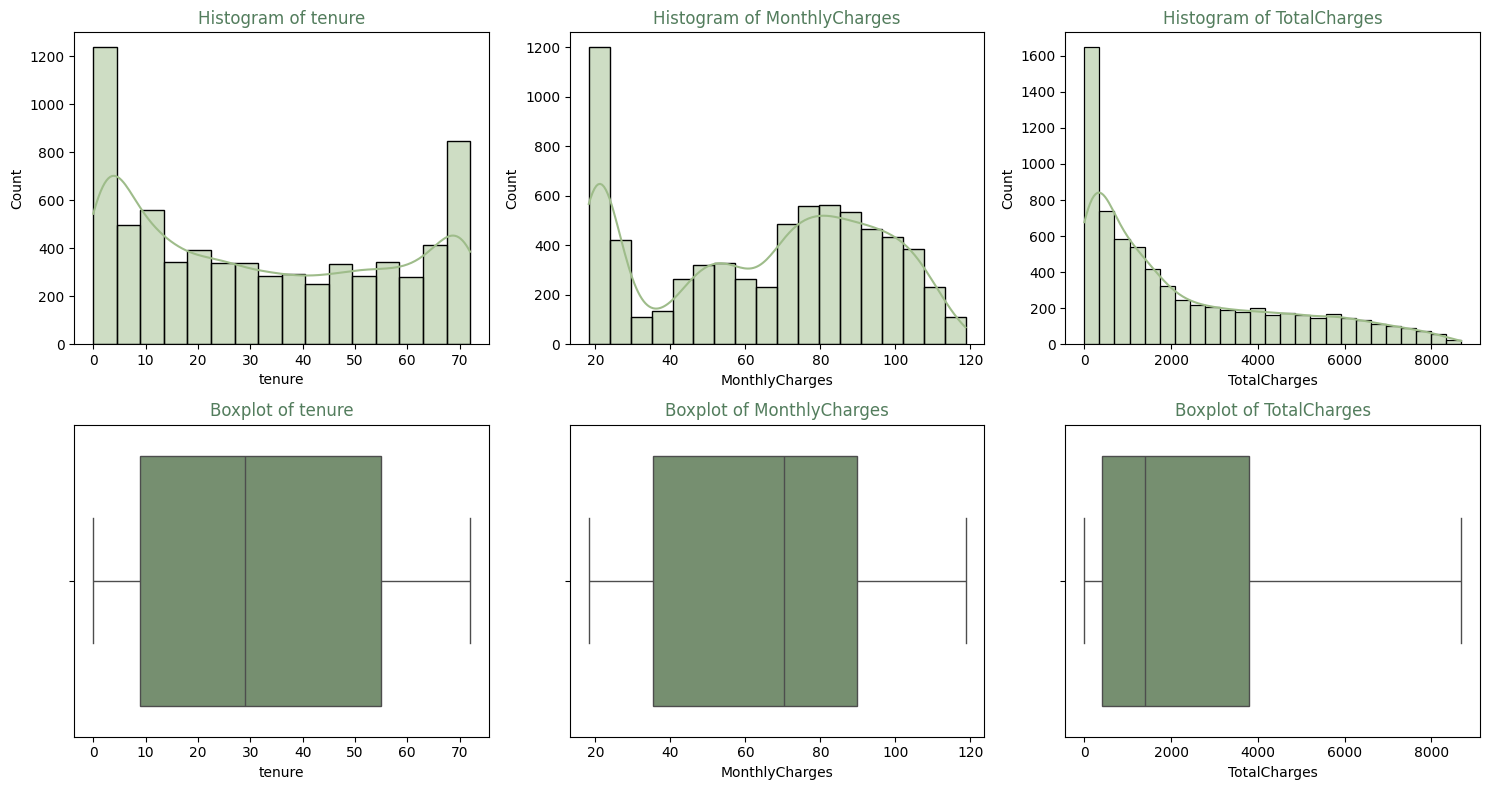

In [18]:
hist_boxplot(cust, num_cols)

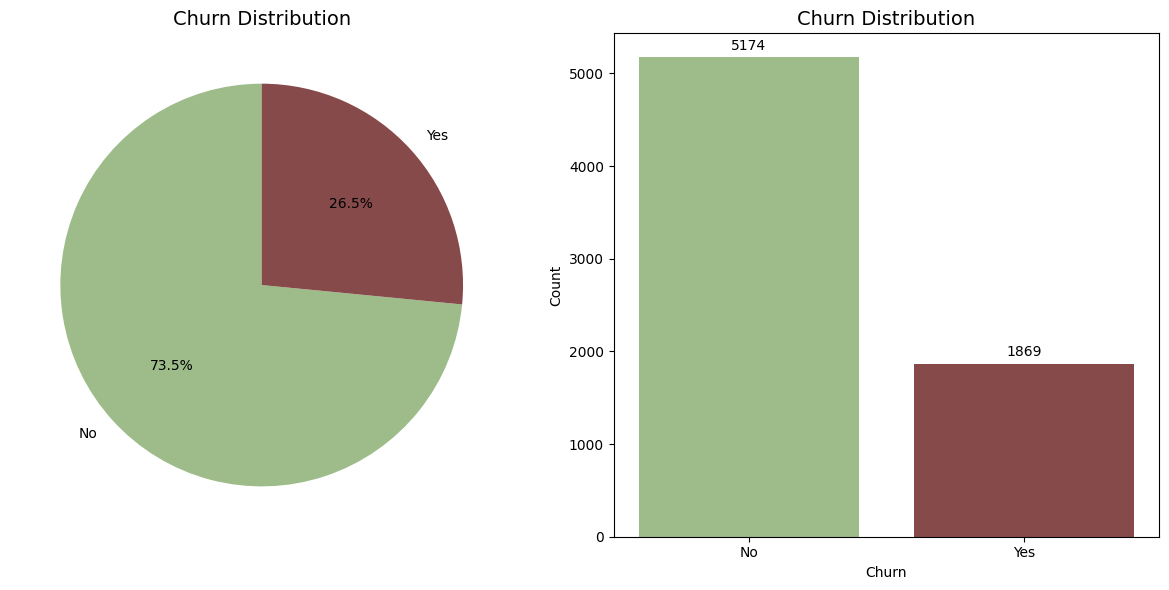

In [19]:
churn_counts = cust['Churn'].value_counts()

# Colors mapping
colors = {'Yes': '#874A4A', 'No': '#9EBC8A'}

# Create subplot (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[label] for label in churn_counts.index]
)
axes[0].set_title('Churn Distribution', fontsize=14)

# Bar chart
bars = axes[1].bar(
    churn_counts.index,
    churn_counts.values,
    color=[colors[label] for label in churn_counts.index]
)
# Add numeric labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height + (0.01 * max(churn_counts.values)),  # a bit above the bar
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

axes[1].set_title('Churn Distribution', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Churn')

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
def pie_chart(df, columns, autopct='%1.1f%%'):
    # Define custom palette
    custom_palette = ['#73946B', '#9EBC8A', '#DDEB9D', '#F8ED8C', '#F9C784', '#FCAF58', '#F98948']

    num_cols = 3  # number of charts per row
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()

        # Repeat colors if number of categories exceeds palette length
        colors = (custom_palette * ((len(value_counts) // len(custom_palette)) + 1))[:len(value_counts)]

        axes[i].pie(
            value_counts,
            labels=value_counts.index,
            autopct=autopct,
            startangle=90,
            colors=colors
        )
        axes[i].set_title(f"Distribution of {column}", fontsize=12)
        axes[i].axis('equal')

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

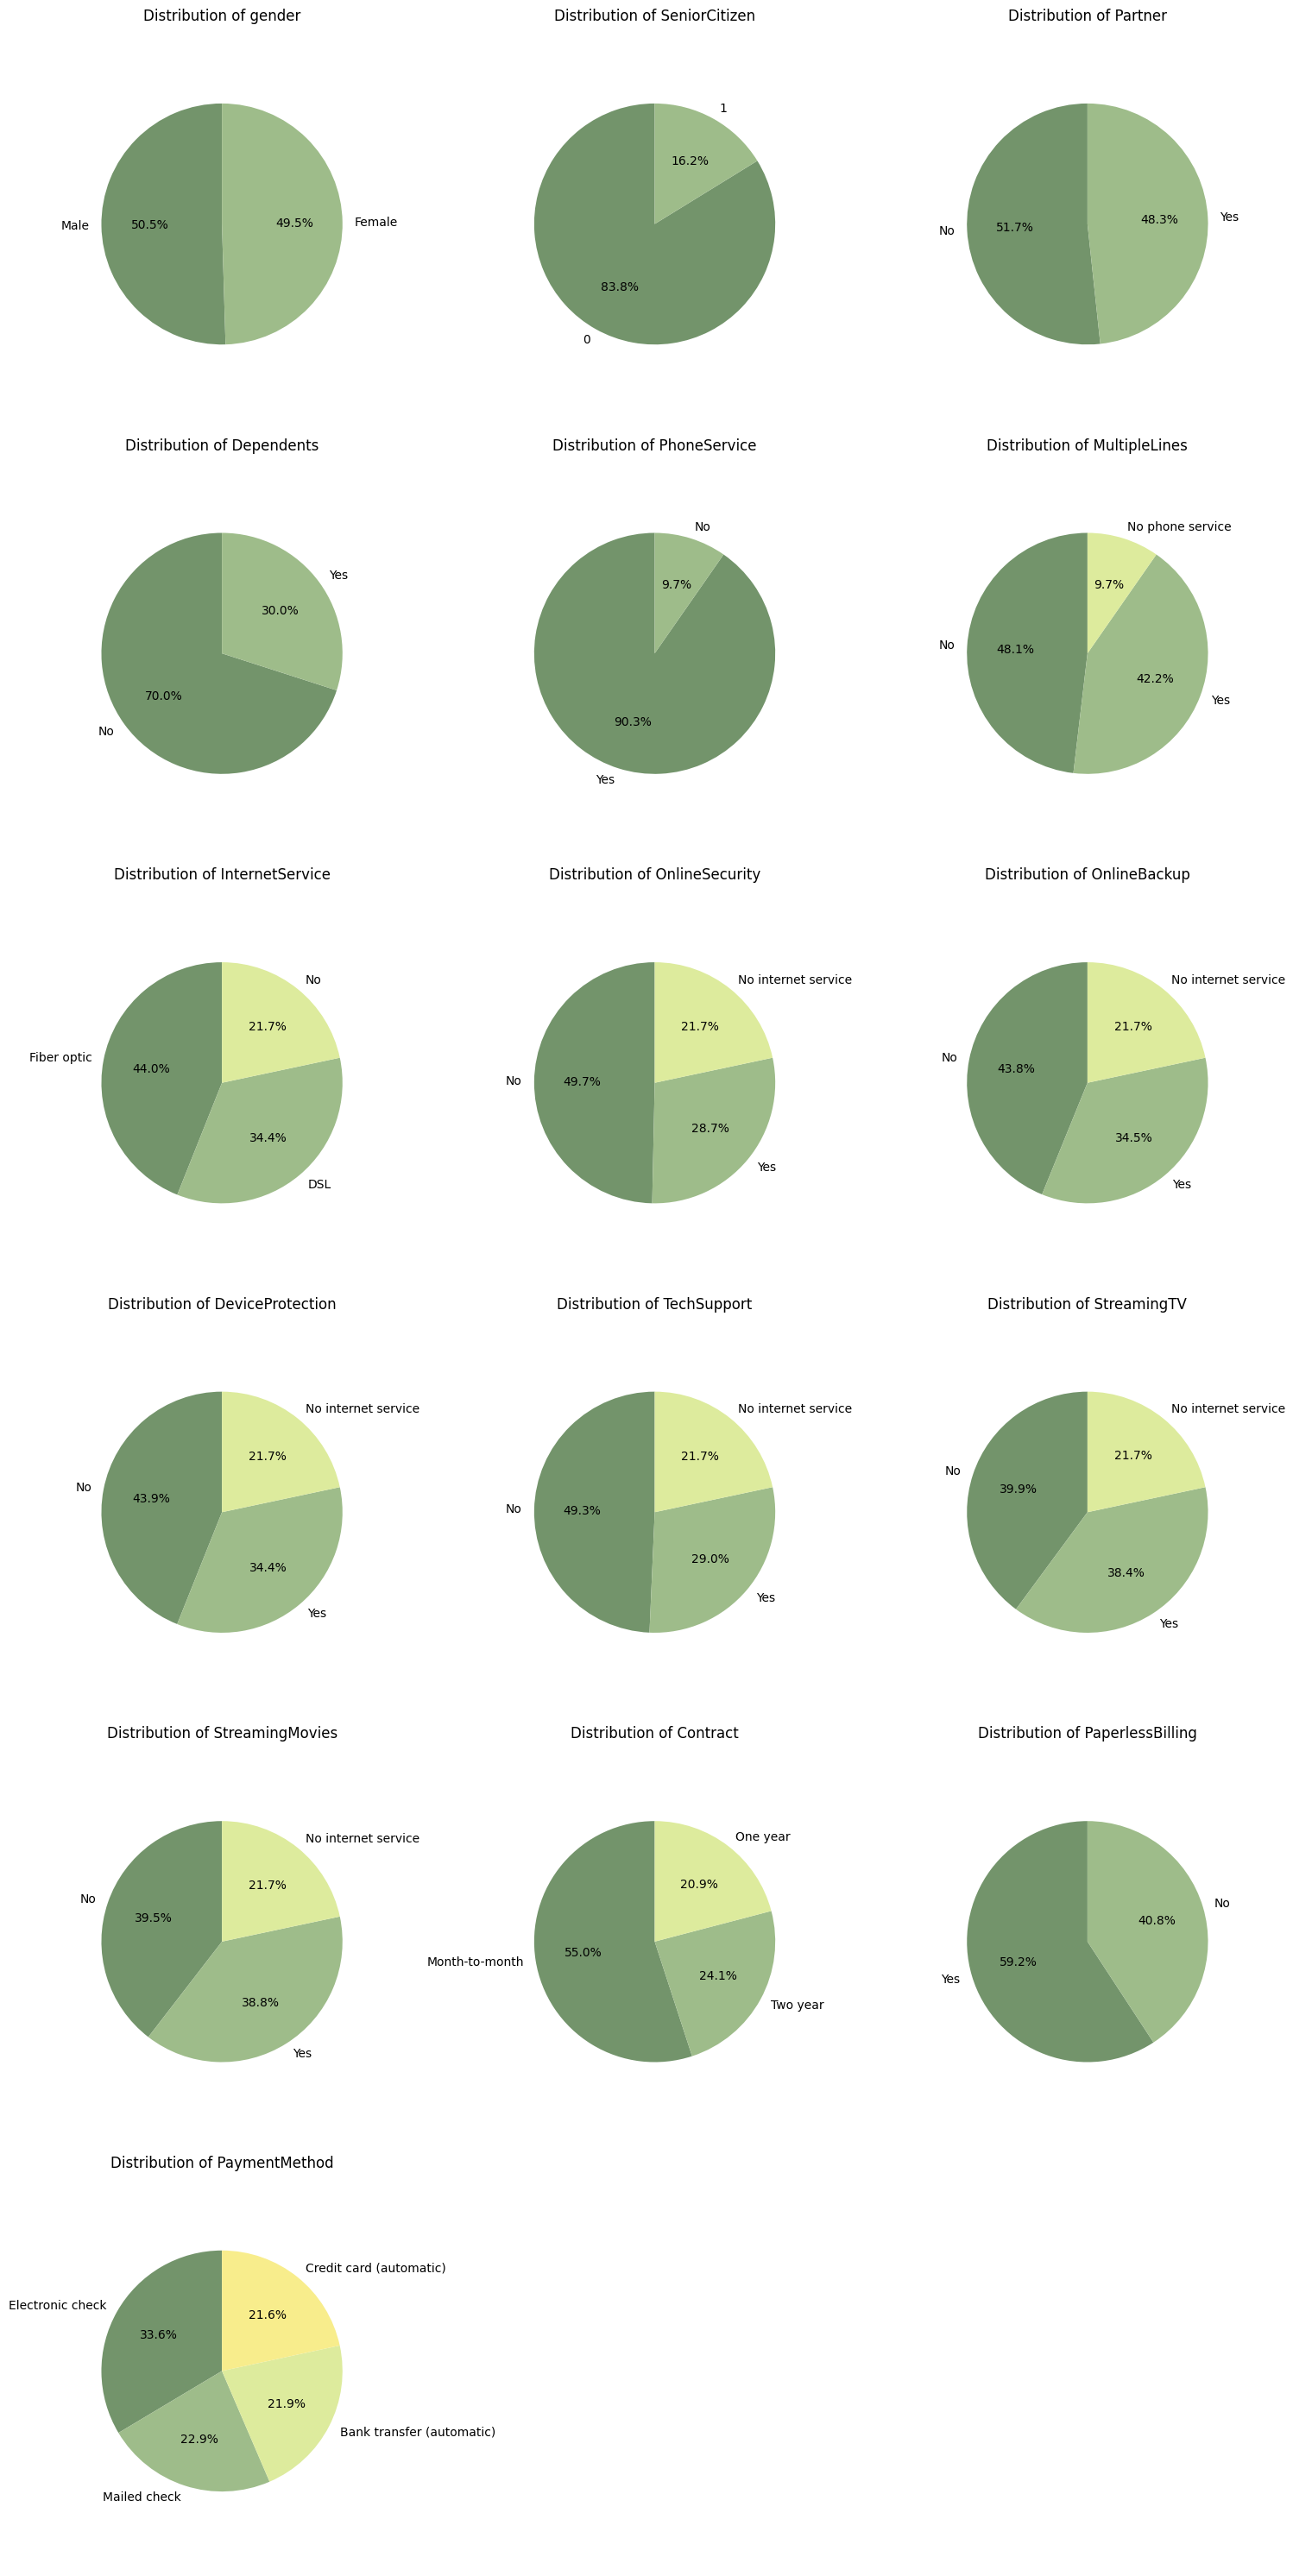

In [22]:
pie_chart(cust, cat_cols)
